Aşağıdaki kod bloğunda mypgmwrite ve mypgmread fonksiyonları yer almaktadır.

In [142]:
def mypgmwrite(fileName, k, magicNumber, comment, width, height, intensity):
    maxVal = 2**k - 1
    with open(fileName, "wb") as file:
        file.write(magicNumber.encode() + b"\n")
        if comment:
            file.write(comment.encode() + b"\n")
        file.write(str(width).encode() + b" " + str(height).encode() + b"\n")
        file.write(str(maxVal).encode() + b"\n")
        file.write(intensity)


def mypgmread(fileName):
    with open(fileName, "rb") as file:
        header = file.readline().decode(encoding="ascii").strip()
        comment = file.readline().decode(encoding="ascii").strip()
        if header not in "P5":
            return print("The read file is not a binary encoded (P5 format) PGM file!")

        sizeInfo = file.readline().decode(encoding="ascii").strip()
        width, height = map(int, sizeInfo.split())

        maxVal = file.readline().decode(encoding="ascii").strip()
        kVal = int(
            mylog2(int(maxVal) + 1)
        )  # Okunan maxVal değerini byte karşılığında ifade etme işlemi

        intensity = file.read()

        return kVal, header, comment, width, height, intensity


def mylog2(input):
    # Bu fonksiyon 2 tabanında logaritma alma işlemini gerçekleştirir, math kütüphanesini kullanmaktan kaçınmak maksadıyla oluşturuldu
    if input == 0:
        return 0
    elif input == 1:
        return 0
    elif input == 2:
        return 1
    else:
        return 1 + mylog2(input / 2)

Aşağıdaki kod bloğunda okunan bir dosyanın doğruca yazılması işlemi gerçekleştirilmektedir. Okunan bir dosyanın yazdırılarak hem okuma hem de yazma fonksiyonlarının test edilmesini sağlamak maksadıyla oluşturulmuştur.

In [143]:
def myReadAndWriteReceived(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)
    mypgmwrite(outputFile, kVal, header, comment, width, height, receivedIntensity)

Aşağıdaki kod bloğu okunan bir görüntünün negatife dönüşümünü sağlamaktadır.

In [144]:
def myImageNegative(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Negatife çevirme işlemi her pixelin değerinin azami pixel değerinden çıkarılmasıyla gerçekleştirilir:
    maxVal = 2**kVal - 1
    negativeIntensity = b""
    for pixel in receivedIntensity:
        negativePixel = maxVal - pixel
        negativeIntensity += bytes([negativePixel])

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, negativeIntensity
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda matplotlib kullanılarak görüntüyü çizdirme işlemi çeşitli layoutlarda gerçekleştirilir.

In [145]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def myPGMDisplay(pgmFile, title):
    image = mpimg.imread(pgmFile)  # pgm dosyasını oku
    plt.imshow(image, cmap="gray")  # görüntüyü gray map'leme ile göster
    plt.title(title)  # plota title ekle
    plt.show()


""" İkili """


def myPGMDisplayDouble(pgmFile, pgmFileOther, title, titleOther, description):
    # Görüntüyü oku
    image = mpimg.imread(pgmFile)
    imageOther = mpimg.imread(pgmFileOther)

    # İki subplot'lu figure oluştur
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # İlk görüntüyü ilk subplot'ta göster
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title(title)

    # İkinci görüntüyü ikinci subplot'ta göster
    axes[1].imshow(imageOther, cmap="gray")
    axes[1].set_title(titleOther)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, -0.05, description, ha="center")

    plt.show()  # plot'u göster


""" Üçlü """


def myPGMDisplayTriple(
    pgmFile1, pgmFile2, pgmFile3, title1, title2, title3, description
):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)
    image3 = mpimg.imread(pgmFile3)

    # Üç subplot'lu figure oluştur
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image1, cmap="gray")
    axes[0].set_title(title1)

    axes[1].imshow(image2, cmap="gray")
    axes[1].set_title(title2)

    axes[2].imshow(image3, cmap="gray")
    axes[2].set_title(title3)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, -0.05, description, ha="center")

    plt.show()  # plot'u göster


""" Dörtlü """


def myPGMDisplayQuadra(
    pgmFile1, pgmFile2, pgmFile3, pgmFile4, title1, title2, title3, title4, description
):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)
    image3 = mpimg.imread(pgmFile3)
    image4 = mpimg.imread(pgmFile4)

    # Dört subplot'lu figure oluştur
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))

    # Görüntüleri subplot'ta göster
    axes[0, 0].imshow(image1, cmap="gray")
    axes[0, 0].set_title(title1)

    axes[0, 1].imshow(image2, cmap="gray")
    axes[0, 1].set_title(title2)

    axes[1, 0].imshow(image3, cmap="gray")
    axes[1, 0].set_title(title3)

    axes[1, 1].imshow(image4, cmap="gray")
    axes[1, 1].set_title(title4)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, -0.07, description, ha="center")

    plt.show()  # plot'u göster


""" Altılı """


def myPGMDisplayHexa(
    pgmFile1,
    pgmFile2,
    pgmFile3,
    pgmFile4,
    pgmFile5,
    pgmFile6,
    title1,
    title2,
    title3,
    title4,
    title5,
    title6,
    description,
):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)
    image3 = mpimg.imread(pgmFile3)
    image4 = mpimg.imread(pgmFile4)
    image5 = mpimg.imread(pgmFile5)
    image6 = mpimg.imread(pgmFile6)

    # Altı subplot'lu figure oluştur
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))

    # Görüntüleri subplot'ta göster
    axes[0, 0].imshow(image1, cmap="gray")
    axes[0, 0].set_title(title1)

    axes[0, 1].imshow(image2, cmap="gray")
    axes[0, 1].set_title(title2)

    axes[1, 0].imshow(image3, cmap="gray")
    axes[1, 0].set_title(title3)

    axes[1, 1].imshow(image4, cmap="gray")
    axes[1, 1].set_title(title4)

    axes[2, 0].imshow(image5, cmap="gray")
    axes[2, 0].set_title(title5)

    axes[2, 1].imshow(image6, cmap="gray")
    axes[2, 1].set_title(title6)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, -0.05, description, ha="center")

    plt.show()  # plot'u göster

Aşağıdaki kod bloğunda log transformation fonksiyonu tanımlanmıştır.

In [146]:
def myLogTransform(inputFile, outputFile, c):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Log transformasyonu gerçekleştirilir:
    logTransformedIntensity = b""
    for pixel in receivedIntensity:
        logTransformedPixel = round(myLog(pixel + 1) * c)
        logTransformedIntensity += bytes([logTransformedPixel])

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, logTransformedIntensity
    )  # işlenen görüntü yazdırılır


def myLog(input):
    # math kütüphanesini import etmemek amacıyla 10 tabanında log alan fonksiyon
    if input <= 0:
        raise ValueError("Input pozitif olmak zorundadır!")
    log = 0
    while input > 1:
        input /= 2
        log += 1

    return log

Aşağındaki kod bloğunda gamma correction fonksiyonu yer almaktadır.

In [147]:
def myGammaCorrection(inputFile, outputFile, c, gamma):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Alınan intensity elemanlarına gamma correction uygulanır:
    correctedIntensity = [c * (x**gamma) for x in receivedIntensity]

    # 0-255 arasına map'lenir
    minIntensity = min(correctedIntensity)
    maxIntensity = max(correctedIntensity)
    normalizedIntensity = [
        (255 * (x - minIntensity) / (maxIntensity - minIntensity))
        for x in correctedIntensity
    ]

    # Gamma Correction uygulanıp normalize edilen elemanlar Byte'ye convert edilir
    gammaCorrectedIntensityBytes = bytes(int(x) for x in normalizedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, gammaCorrectedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağındaki kod bloğunda görüntü yumuşatma fonksiyonu yer almaktadır.

Derste değinildiği gibi iç içe döngü oluşturarak maske görüntüye uygulandı. Benim için en zorlayıcı kısım bu fonksiyonun beklendiği gibi çalışması oldu.

In [148]:
def myImageCorrelation(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Correlation gerçekleştirilir:
    correlatedIntensity = []
    for y in range(height):
        for x in range(width):
            correlatedPixel = 0
            for i in range(len(m)):
                for j in range(len(m[0])):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        correlatedPixel += (
                            receivedIntensity[(y + i) * width + (x + j)] * m[i][j]
                        )

            # Yumuşatılan pixel array'a yazılır:
            correlatedPixel /= (2 * len(m) // 2 + 1) ** 2
            correlatedIntensity.append(round(correlatedPixel))

    # Array byte'ye convert edilir:
    correlatedIntensityBytes = bytes(correlatedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, correlatedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağındaki kod bloğunda averaging mask yöntemiyle impulse noise tipindeki gürültüyü gideren fonksiyon yer almaktadır.

In [149]:
def myAveragingMask(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Averaging Mask yöntemiyle gürültü giderilmesi işlemi:
    averagingMaskedIntensity = []
    for y in range(height):
        for x in range(width):
            averagingMaskedPixel = 0
            for i in range(len(m) // 2, len(m) // 2 + 1):
                for j in range(len(m[0]) // 2, len(m[0]) // 2 + 1):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        averagingMaskedPixel += (
                            receivedIntensity[(y + i) * width + (x + j)]
                            * m[i + len(m) // 2][j + len(m[0]) // 2]
                        )

            # Gürültüsü giderilen pixel array'a yazılır, 0-255 arasında değerlendirilir:
            averagingMaskedPixel = max(0, min(255, round(averagingMaskedPixel)))
            averagingMaskedIntensity.append(averagingMaskedPixel)

    # Array byte'ye convert edilir:
    averagingMaskedIntensityBytes = bytes(averagingMaskedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, averagingMaskedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağındaki kod bloğunda median filter yöntemiyle impulse noise tipindeki gürültüyü gideren fonksiyon yer almaktadır.

In [150]:
def myMedianFilter(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Median Filter yöntemiyle gürültü giderilmesi işlemi:
    medianFilteredIntensity = []
    for y in range(height):
        for x in range(width):
            medianFilteredPixel = []
            for i in range(-len(m) // 2, len(m) // 2 + 1):
                for j in range(-len(m[0]) // 2, len(m[0]) // 2 + 1):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        medianFilteredPixel.append(
                            receivedIntensity[(y + i) * width + (x + j)]
                            * m[i + len(m) // 2][j + len(m[0]) // 2]
                        )

            # Gürültüsü giderilen pixel array'a yazılır:
            medianFilteredPixel.sort()
            medianFilteredIntensity.append(
                medianFilteredPixel[len(medianFilteredPixel) // 2]
            )

    # Array byte'ye convert edilir:
    medianFilteredIntensityBytes = bytes(medianFilteredIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, medianFilteredIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda histogram equalizing fonksiyonu yer almaktadır.

In [151]:
def myHistogramEqualize(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Histogram oluşturulur
    histogram = [0 for i in range(256)]
    for pixel in receivedIntensity:
        histogram[pixel] += 1

    # Eşitleme fonksiyonu hesaplanır
    equalizationFunction = [0 for i in range(256)]
    for i in range(256):
        for j in range(i + 1):
            equalizationFunction[i] += histogram[j]
        equalizationFunction[i] = round(
            equalizationFunction[i] * 255 / (width * height)
        )

    # Görüntü eşitlenir
    equalizedIntensity = []
    for pixel in receivedIntensity:
        equalizedIntensity.append(equalizationFunction[pixel])

    equalizedIntensityBytes = bytes(equalizedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, equalizedIntensityBytes
    )  # işlenen görüntü yazdırılır

    return (
        histogram,
        equalizationFunction,
    )  # histogram grafiği için histogram, s=T(r) grafiği için equalizationFunction değişkenleri döndürülür

Aşağıdaki kod bloğunda histogram equalization işlemindeki histogram grafiği çizdirilir.

In [152]:
""" Üçlü plot mantığıyla iki görüntü dosyası bir de histogram grafiği göstermektedir """


def myHistogramGraphDraw(
    pgmFile1, pgmFile2, histogram, title1, title2, title3, description
):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)

    # Üç subplot'lu figure oluştur
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image1, cmap="gray")
    axes[0].set_title(title1)

    axes[1].imshow(image2, cmap="gray")
    axes[1].set_title(title2)

    axes[2].plot(histogram)
    axes[2].set_title(title3)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, -0.1, description, ha="center")

    plt.show()

Aşağıdaki kod bloğunda histogram equalizing fonksiyonunda oluşan s=T(r) fonksiyonu grafiğini çizdiren fonksiyon yer almaktadır.

In [153]:
def myDrawSFunctionGraph(s1, s2, s3, s4, title1, title2, title3, title4, description):
    # Dört subplot'lu figure oluştur
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))

    axes[0, 0].plot(range(256), s1)
    axes[0, 0].set_title(title1)

    axes[0, 1].plot(range(256), s2)
    axes[0, 1].set_title(title2)

    axes[1, 0].plot(range(256), s3)
    axes[1, 0].set_title(title3)

    axes[1, 1].plot(range(256), s4)
    axes[1, 1].set_title(title4)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, 0, description, ha="center")

    plt.show()

Aşağıdaki kod bloğunda scale etmeyen Laplacian fonksiyonu yer almaktadır.

In [154]:
def myLaplacianWithoutScaling(inputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Laplacian filtresi oluşturulur
    laplacianFilter = mask

    # Görüntü Laplacian filtresi ile işlemden geçirilir
    processedIntensity = []
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            filteredPixel = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    filteredPixel += (
                        laplacianFilter[k + 1][l + 1]
                        * receivedIntensity[(i + k) * width + (j + l)]
                    )
            processedIntensity.append(filteredPixel)

    return processedIntensity  # işlenen görüntü döndürülür

Aşağıdaki kod bloğunda scale eden Laplacian fonksiyonu yer almaktadır.

In [155]:
def myLaplacianWithScaling(inputFile, outputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Alınan veri listelenir
    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]

    # Laplacian filtresi uygulanmış sonuçları tutacak liste oluşturulur
    processedIntensity = [[0] * width for _ in range(height)]

    # Laplacian filtresi uygulanır
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            laplacianSum = 0
            for i in range(3):
                for j in range(3):
                    laplacianSum += inputImage[y + i - 1][x + j - 1] * mask[i][j]
            processedIntensity[y][x] = laplacianSum

    # Laplacian filtreli sonuçlar [0, 255] arasına ölçeklenir
    maxVal = max(map(max, processedIntensity))
    minVal = min(map(min, processedIntensity))
    scalingFactor = 255 / (maxVal - minVal)
    scaledIntensity = [
        [int((x - minVal) * scalingFactor) for x in row] for row in processedIntensity
    ]

    # Ölçeklendirilmiş veri düzleştirilirek byte cinsine çevrilir
    processedIntensity = [val for row in scaledIntensity for val in row]
    processedIntensityBytes = bytes(processedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, processedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda Figure 3.38 (d) için Figure 3.37'de yer alan image sharpening işlemi uygulanmaktadır.

In [156]:
def mySharpenUsingLaplacian(inputFile, outputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Alınan veri listelenir
    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]

    # Keskinleştirilmiş verinin tutulacağı liste
    sharpenedIntensity = [[0] * width for _ in range(height)]

    # Laplacian filtresi uygulanır
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            laplacianSum = 0
            for i in range(3):
                for j in range(3):
                    laplacianSum += inputImage[y + i - 1][x + j - 1] * mask[i][j]
            sharpenedIntensity[y][x] = receivedIntensity[y * width + x] - laplacianSum

    # Veriler [0, 255] aralığında ölçeklenir
    for y in range(height):
        for x in range(width):
            sharpenedIntensity[y][x] = max(0, min(255, sharpenedIntensity[y][x]))

    # Keskinleştirilmiş veri PGM'e yazdırılmak için düzleştirilerek ölçeklenir ve byte cinsinden dönüşümü gerçekleştirilir
    sharpenedIntensityScaled = [val for row in sharpenedIntensity for val in row]
    sharpenedIntensityBytes = bytes(sharpenedIntensityScaled)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, sharpenedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda Gaussian filter ile görüntüyü yumuşatan fonksiyon yer almaktadır. 

In [157]:
def myGaussianBlur(inputFile, outputFile, maskSize, sigma):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)

    # receivedIntensity'i 2 boyutlu listeye çevirilir
    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]

    # 2 boyutlu gaussian kernel oluşturulur
    kernel = [[0] * maskSize for _ in range(maskSize)]
    kernelCenter = maskSize // 2
    kernelSum = 0

    for i in range(maskSize):
        for j in range(maskSize):
            x = i - kernelCenter
            y = j - kernelCenter
            kernel[i][j] = (1 / (2 * 3.1416 * sigma**2)) * (
                2.71828 ** (-1 * (x**2 + y**2) / (2 * sigma**2))
            )
            kernelSum += kernel[i][j]

    for i in range(maskSize):
        for j in range(maskSize):
            kernel[i][j] /= kernelSum

    # Yumuşatılmış görüntü verisini tutacak liste
    blurredIntensity = [[0] * width for _ in range(height)]

    # Gaussian filtresi uygulanır
    for y in range(height):
        for x in range(width):
            weightedSum = 0
            for i in range(maskSize):
                for j in range(maskSize):
                    neighborX = x + i - kernelCenter
                    neighborY = y + j - kernelCenter
                    if 0 <= neighborX < width and 0 <= neighborY < height:
                        weightedSum += inputImage[neighborY][neighborX] * kernel[i][j]
            blurredIntensity[y][x] = int(weightedSum)

    # Yumuşatılmış görüntü içeriği düzleştirilip byte cinsine çevrilir
    blurredIntensityFlatten = [val for row in blurredIntensity for val in row]
    blurredIntensityBytes = bytes(blurredIntensityFlatten)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, blurredIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda 2 boyutlu discrete fast Fourier transform fonksiyonu yer almaktadır.

In [158]:
import numpy as np


def my1Dfft(input):
    return np.fft.fft(input)


def my2Dfft(intensity, width, height):
    # intensity'i 2 boyutlu listeye çevirilir
    intensityList = np.frombuffer(intensity, dtype=np.uint8).reshape((height, width))

    intensityList = intensityList.astype(np.float64)

    rowsFFT = np.zeros_like(intensityList, dtype=np.complex128)

    # satırlara fft uygulama
    for i in range(height):
        rowsFFT[i, :] = my1Dfft(intensityList[i, :])

    columnsFFT = np.zeros_like(intensityList, dtype=np.complex128)

    # sütunlara fft uygulama
    for i in range(width):
        columnsFFT[:, i] = my1Dfft(rowsFFT[:, i])

    shifted = np.fft.fftshift(columnsFFT)  # DC'yi merkeze alma

    magnitude = 20 * np.log(np.abs(shifted) + 1)
    normalize = (magnitude / np.max(magnitude)) * 255

    return normalize.astype(
        np.uint8
    ).tobytes()  # ölçeklenen veri byte cinsine çevrilerek döndürülür

Aşağıdaki kod bloğunda çift yönlü sobel uygulayan fonksiyon yer almaktadır.

In [159]:
def myApplySobel(intensity, width, height):
    def getPixel(intensity, x, y):
        if x < 0 or y < 0 or x >= width or y >= height:
            return 0
        return intensity[x + y * width]

    result = bytearray(width * height)
    Gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    Gy = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

    for y in range(height):
        for x in range(width):
            GxSum = 0
            GySum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    gradientX = getPixel(intensity, x + i, y + j)
                    gradientY = getPixel(intensity, x + i, y + j)
                    GxSum += Gx[i + 1][j + 1] * gradientX
                    GySum += Gy[i + 1][j + 1] * gradientY
            result[x + y * width] = min(int((abs(GxSum) + abs(GySum)) // 2), 255)
    return result

def mySobel(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    outputIntensity = myApplySobel(receivedIntensity, width, height)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

In [160]:
def myMaskImages(image1, image2, outputImage):
    kVal, header, comment, width, height, intensity1 = mypgmread(
        image1
    )  # 1. görüntü okunarak veriler çekilir
    _, _, _, _, _, intensity2 = mypgmread(image2)

    maskedImage = bytearray(width * height)
    for i in range(width * height):
        pixelVal = min(intensity1[i] * intensity2[i] // 255, 255)
        maskedImage[i] = pixelVal

    mypgmwrite(
        outputImage, kVal, header, comment, width, height, maskedImage
    )  # işlenen görüntü yazdırılır

In [161]:
def mySumImages(image1, image2, outputImage):
    kVal, header, comment, width, height, intensity1 = mypgmread(
        image1
    )  # 1. görüntü okunarak veriler çekilir
    _, _, _, _, _, intensity2 = mypgmread(image2)

    summedImage = bytearray(width * height)
    for i in range(width * height):
        pixelSum = min(intensity1[i] + intensity2[i], 255)
        summedImage[i] = pixelSum

    mypgmwrite(
        outputImage, kVal, header, comment, width, height, summedImage
    )  # işlenen görüntü yazdırılır

Homomorfik filtre

In [162]:
def myHomomorphicFilter(image, width, height, gamma_l=0.3, gamma_h=1.5, d0=50):
    intensityList = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

    rows, cols = intensityList.shape
    r, c = np.meshgrid(
        np.arange(rows), np.arange(cols), indexing="ij"
    )

    center_r = rows // 2
    center_c = cols // 2

    # filtreyi oluştur
    h = (gamma_h - gamma_l) * (
        1 - np.exp(-((r - center_r) ** 2 + (c - center_c) ** 2) / (2 * d0**2))
    ) + gamma_l

    # frekans düzlemindeki görüntü verisine filtreyi uygula
    imageFiltered = intensityList * h

    return imageFiltered.astype(np.uint8).tobytes()  # bytes türünden dönüşümü yaparak filtrelenmiş görüntü verisini döndür

Aşağıdaki kod bloğunda tek yönlü sobel uygulayan kod yer almaktadır

In [163]:
def myApplySobelInOneDirection(intensity, width, height, direction):
    def getPixel(intensity, x, y):
        if x < 0 or y < 0 or x >= width or y >= height:
            return 0
        return intensity[x + y * width]

    result = bytearray(width * height)
    Gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    Gy = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

    for y in range(height):
        for x in range(width):
            GSum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    gradient = getPixel(intensity, x + i, y + j)
                    if direction == "x":
                        GSum += Gx[i + 1][j + 1] * gradient
                    elif direction == "y":
                        GSum += Gy[i + 1][j + 1] * gradient
            result[x + y * width] = min(int(abs(GSum) // 2), 255)
    return result


def mySobelInOneDirection(inputFile, outputFile, direction):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)

    outputIntensity = myApplySobelInOneDirection(
        receivedIntensity, width, height, direction
    )

    mypgmwrite(outputFile, kVal, header, comment, width, height, outputIntensity)

Aşağıdaki kod bloğunda Figure 10.16'daki alıştırmalar uygulanmıştır.

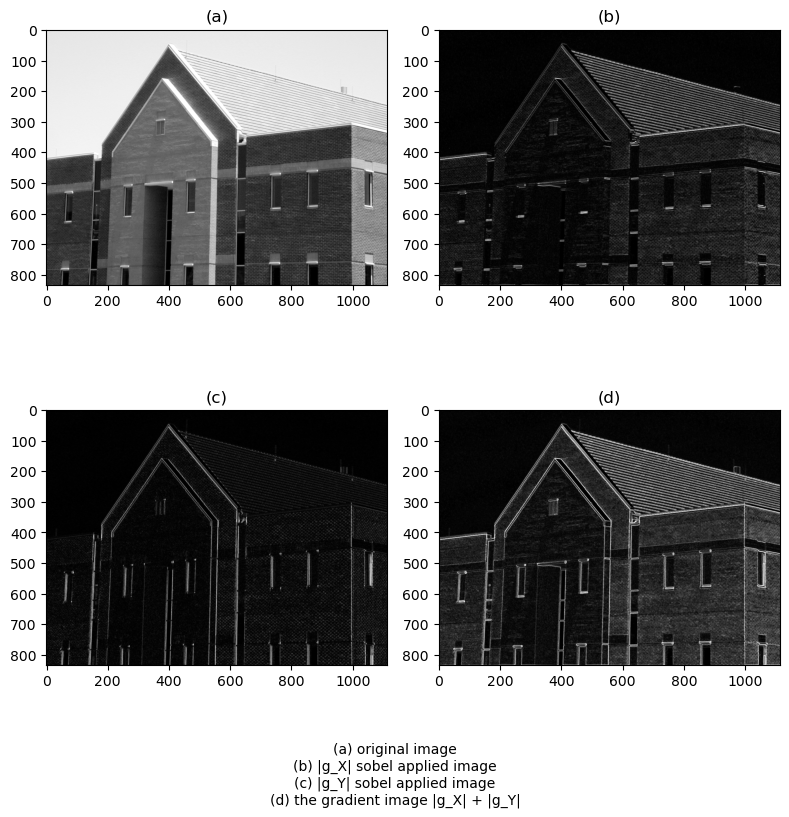

In [164]:
if __name__ == "__main__":
    fig1016a = "Fig1016(a)(building_original).pgm"

    fig1016b = "Fig1016(b).pgm"
    mySobelInOneDirection(fig1016a, fig1016b, "x")

    fig1016c = "Fig1016(c).pgm"
    mySobelInOneDirection(fig1016a, fig1016c, "y")

    fig1016d = "Fig1016(d).pgm"
    mySobel(fig1016a, fig1016d)

    title1 = "(a)"
    title2 = "(b)"
    title3 = "(c)"
    title4 = "(d)"
    description = "(a) original image\n(b) |g_X| sobel applied image\n(c) |g_Y| sobel applied image\n(d) the gradient image |g_X| + |g_Y|"
    myPGMDisplayQuadra(fig1016a, fig1016b, fig1016c, fig1016d, title1, title2, title3, title4, description)

Figure 10.16'da orijinal görüntüye x ve y yönlü sobel operasyonları uygulandı. Son adımda iki sobel operasyonu birlikte gösterildi. Buradaki alıştırmada orijinal görüntü (a) son adımdaki (d) görüntüyle karşılaştırıldığında, orijinal görüntüdeki bina görüntüsünün kenar tespiti yapıldığı görülmektedir. Fakat burada çatı kaplamasında kullanılan malzeme ve bina dış cephesindeki dokuda kenarların tespit edildiği görülmektedir. Bu durumda istenmeyen detayların da açığa çıkartıldığı gözlemlenmiştir.

Aşağıdaki kod bloğunda Figure 10.18 işlemleri yapıldı

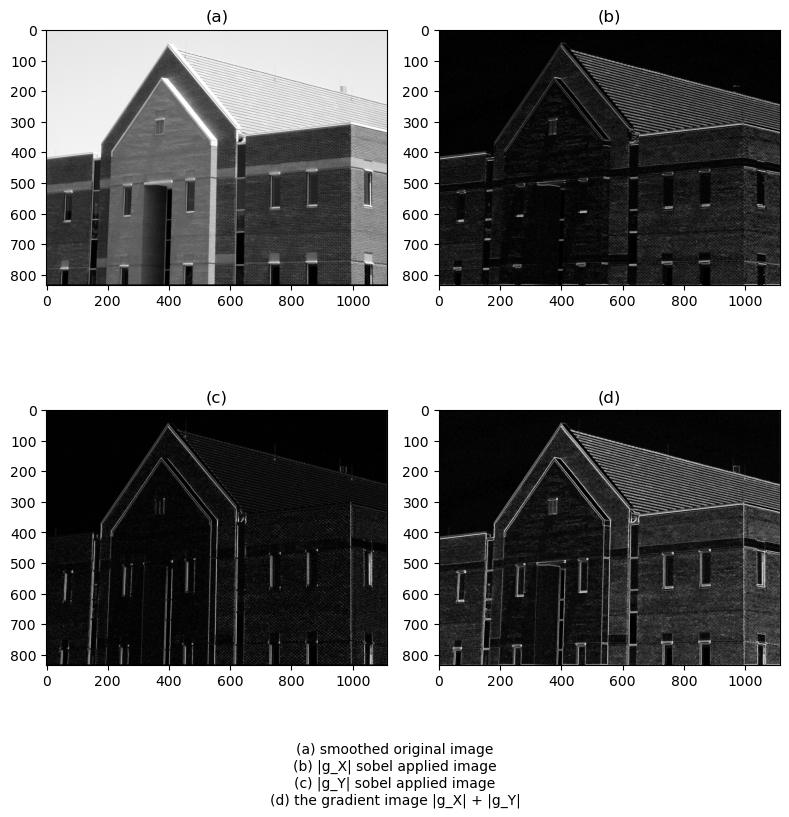

In [165]:
if __name__ == "__main__":
    fig1018original = "Fig1018(a)(building_original).pgm"

    fig1018a = "Fig1018(a)(blurred).pgm"
    mask = [[1, 1, 1, 1, 1], 
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1]]

    myAveragingMask(fig1018original, fig1018a, mask)

    fig1018b = "Fig1018(b).pgm"
    mySobelInOneDirection(fig1018a, fig1018b, "x")

    fig1018c = "Fig1018(c).pgm"
    mySobelInOneDirection(fig1018a, fig1018c, "y")

    fig1018d = "Fig1018(d).pgm"
    mySobel(fig1018a, fig1018d)

    title1 = "(a)"
    title2 = "(b)"
    title3 = "(c)"
    title4 = "(d)"
    description = "(a) smoothed original image\n(b) |g_X| sobel applied image\n(c) |g_Y| sobel applied image\n(d) the gradient image |g_X| + |g_Y|"
    myPGMDisplayQuadra(
        fig1018a,
        fig1018b,
        fig1018c,
        fig1018d,
        title1,
        title2,
        title3,
        title4,
        description,
    )

Figure 10.18 işlemleri uygulanırken istendiği üzere orijinal bina görüntüsüne 5x5'lik bir maske uygulanarak görüntü yumuşatıldı. Yumuşatılan görüntüye x ve y yönlü sobel işlemleri uygulandı. (d) aşamasında iki yönlü sobel uygulanarak görüntü gösterildi. Bu uygulamada yumuşatılmış görüntüye sobel uygulandığı takdirde çatı kaplaması ve bina dış cephesi dokusundaki istenmeyen detaylar gösterilmeyerek binanın kenarları daha açık bir biçimde gösterildi.

Aşağıdaki kod bloğunda global threshold fonksiyonu yer almaktadır

In [166]:
def myGlobalThreshold(inputFile, outputFile, thresholdVal):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]  # listelendi

    outputIntensity = []
    for i in range(height):
        row = []
        for j in range(width):
            if inputImage[i][j] > thresholdVal:
                row.append(kVal - 1)  # beyaz ön plan
            else:
                row.append(0)  # siyah arkaplan
        outputIntensity.append(row)

    # byte dönüşümü için flatten işlemi
    flattenedOutputIntensity = [
        pixel for sublist in outputIntensity for pixel in sublist
    ]
    outputIntensityBytes = bytes(flattenedOutputIntensity)  # byte dönüşümü

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, outputIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda Figure 10.35'teki uygulama yapıldı

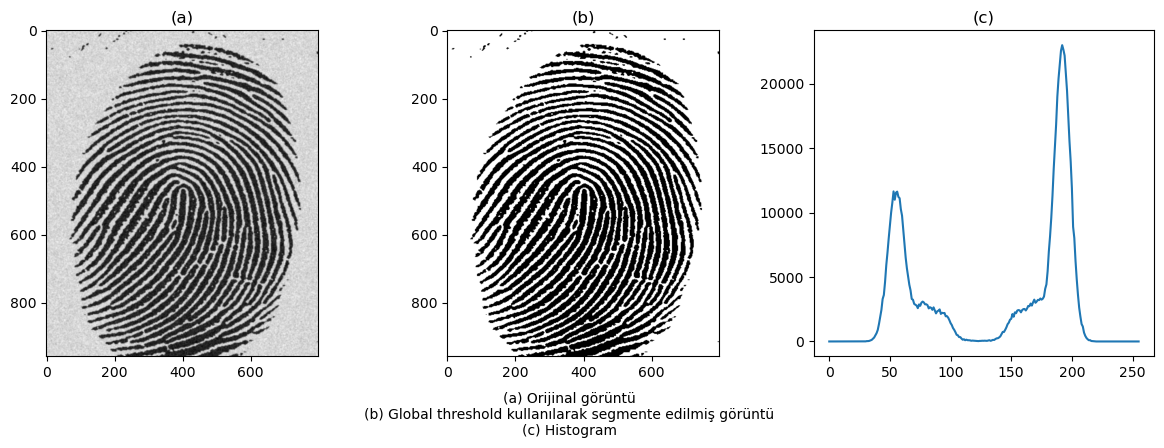

In [167]:
if __name__ == "__main__":
    fig1035a = "Fig1035(a)(noisy_fingerprint).pgm"

    fig1035b = "Fig1035(b).pgm"
    thresholdVal = 128
    myGlobalThreshold(fig1035a, fig1035b, thresholdVal)

    fig1035c = "Fig1035(c).pgm"

    title1 = "(a)"
    title2 = "(b)"
    title3 = "(c)"
    description = "(a) Orijinal görüntü\n(b) Global threshold kullanılarak segmente edilmiş görüntü\n(c) Histogram"

    histogram, equalizationFunction = myHistogramEqualize(fig1035a, fig1035c)

    myHistogramGraphDraw(
        fig1035a, fig1035b, histogram, title1, title2, title3, description
    )

Burada parmak izi görüntüsü global thresholding kullanılarak segmentasyonu gerçekleştirildi. Böylece orijinal görüntüde gözden kaçırılabilecek olan detaylar açığa çıkartıldı.

Otsu thresholding fonksiyonu

In [168]:
def myOtsuThresholding(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]  # listelendi

    # Histogram hesaplanır
    histogram = [0] * 256
    total_pixels = height * width

    for i in range(height):
        for j in range(width):
            intensity = inputImage[i][j]
            histogram[intensity] += 1

    # Histogram normalize edilerek olasılıklar hesaplanır
    probabilities = [count / total_pixels for count in histogram]

    # Kümilatif toplamlar hesaplanır
    cumulativeSum = [sum(probabilities[: i + 1]) for i in range(256)]

    # Otsu algoritmasında kullanılacak varyans ve thresholding değişkenleri initialise edilir
    max_variance = 0
    threshold = 0

    # Otsu algorithması:
    for t in range(1, 256):
        w0 = cumulativeSum[t]
        w1 = 1 - w0

        if w0 == 0 or w1 == 0:
            continue

        # Kümilatif ortalamalar hesaplanır
        mu0 = sum(i * probabilities[i] for i in range(t)) / w0
        mu1 = sum(i * probabilities[i] for i in range(t, 256)) / w1

        variance = w0 * w1 * ((mu0 - mu1) ** 2)

        if variance > max_variance:
            max_variance = variance
            threshold = t

    # Hesaplanan eşik değerine göre görüntünün eşik değeri belirlenir
    outputIntensity = []
    for i in range(height):
        row = []
        for j in range(width):
            if inputImage[i][j] > threshold:
                row.append(kVal - 1)
            else:
                row.append(0)
        outputIntensity.append(row)

    # Byte dönüşümü için flatten işlemi
    flattenedOutputIntensity = [
        pixel for sublist in outputIntensity for pixel in sublist
    ]
    outputIntensityBytes = bytes(flattenedOutputIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, outputIntensityBytes
    )  # işlenen görüntü yazdırılır

Local thresholding fonksiyonu

In [211]:
def myCalculateLocalThreshold(inputImage, i, j, windowSize):
    # Local çerçevenin boyutu hesaplanır
    startRow = max(0, i - windowSize // 2)
    endRow = min(len(inputImage), i + windowSize // 2 + 1)
    startCol = max(0, j - windowSize // 2)
    endCol = min(len(inputImage[0]), j + windowSize // 2 + 1)

    # Çerçeve içinde kalan yoğunluk değerlerinin ortalaması alınır
    total = 0
    count = 0
    for row in range(startRow, endRow):
        for col in range(startCol, endCol):
            total += inputImage[row][col]
            count += 1

    local_average = total / count
    return local_average


def myLocalThresholding(inputFile, outputFile, windowSize=1):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]

    outputIntensity = []
    for i in range(height):
        row = []
        for j in range(width):
            thresholdVal = myCalculateLocalThreshold(inputImage, i, j, windowSize)
            if inputImage[i][j] > thresholdVal:
                row.append(kVal)  # ön plan
            else:
                row.append(0)  # arka plan beyaz
        outputIntensity.append(row)

    # byte dönüşümü için flatten işlemi
    flattenedOutputIntensity = [
        pixel for sublist in outputIntensity for pixel in sublist
    ]
    outputIntensityBytes = bytes(flattenedOutputIntensity)  # byte dönüşümü

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, outputIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda Figure 10.45'teki uygulama yapılmıştır

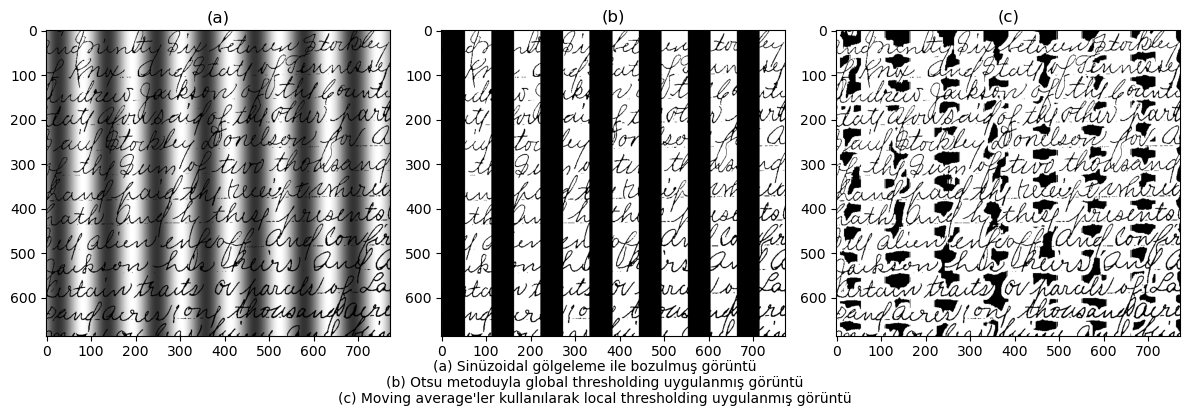

In [226]:
if __name__ == "__main__":
    fig1045a = "Fig1045(a)(sine_shaded_text_image).pgm"
    
    fig1045b = "Fig1045(b).pgm"
    myOtsuThresholding(fig1045a, fig1045b)
    
    fig1045c = "Fig1045(c).pgm"
    windowSize = 19
    myLocalThresholding(fig1045a, fig1045c, windowSize)

    title1 = "(a)"
    title2 = "(b)"
    title3 = "(c)"
    description = "(a) Sinüzoidal gölgeleme ile bozulmuş görüntü\n(b) Otsu metoduyla global thresholding uygulanmış görüntü\n(c) Moving average'ler kullanılarak local thresholding uygulanmış görüntü"
    myPGMDisplayTriple(fig1045a, fig1045b, fig1045c, title1, title2, title3, description)

Yukarıdaki uygulamada sinüzoidal gölgeleme ile bozulmuş bir görüntüye Otsu metoduyla global thresholding ve moving average'ler kullanılarak local thresholding uygulanmış görüntüler yer almaktadır. Burada global thresholding uygulandığında görüntüdeki parlaklık farkından dolayı global thresholding'te parlak ve gölgeli alanlarda yazı ile arka planın ayrılamadığı gözlemlendi. Moving averageler kullanılarak local thresholding uygulanmış görüntüde ise threshold uygulanan bölgeler gölge boyunda ayrıldığı için yazı ve arkaplanın daha iyi ayrıldığı gözlemlendi. Local thresholding uygulanırken kullanılan window boyutunun tespitinde hata olduğundan bazı bölgelerde yazı ve arka plan ayrıştırılamayarak siyah bölgeler oluştuğu gözlemlendi. Bu hata henüz çözülemedi.